# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn.preprocessing
%matplotlib inline

The following function may be useful for loading the necessary data.

In [2]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

In [5]:
def grad(x, y, w, l, N):
    '''returns the gradient of the regularized weight function
    at a single point
    inputs: x - x array of single point
            y - classification
            w - weight vector with bias term included
            l - lambda for regularization
            N - size of the training set
    outputs: grad - gradient at the point'''
    #norm of logistic error
    num = -1 * y * np.exp(-1 * y * np.dot(np.transpose(w), x)) * x
    den = (1 + np.exp(-1 * y * np.dot(np.transpose(w), x)))
    
    norm_grad = 2 * l / N * w    #norm of regularization term
    grad = num/den + norm_grad    #sum to get gradient
    
    return grad

def log_error(X, Y, w):
    '''calculates the logistic error across a data set; does not include regularization
    inputs: X: A (N, D) shaped numpy array containing the data points.
            Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
            w: A (D, ) shpaed array holding the weight vector'''
    
    total_loss = 0
    for i in range(len(Y)):
        total_loss -= np.log(1/(1 + np.exp(-1 * Y[i] * np.dot(np.transpose(w), X[i]))))
    
    return total_loss/len(Y)  #return average log loss


def SGD(X, Y, eta, N_epochs, l):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        W: A (D, ) shaped array containing the weight vectors from all iterations.
    '''
    D = len(X[0])                       #number of dimensions
    N = len(Y)                          #number of samples
    w = (np.random.rand(D) - 0.5) / 10  #randomly initialize weights [-0.05, 0.05]
    
    for i in range(N_epochs):           #iterate for set number of epochs
        perm = list(range(N))           #indices of all points
        np.random.permutation(perm)     #shuffle order that points are added in
        
        for p in perm:                  #compute gradient at each point and sum
            x = X[p]
            y = Y[p]
    
            w -= eta * grad(x, y, w, l, N)   #gradient summed across all points
               
    
    return w

def clean(filename):
    '''opens and prepares a dataset for use; normalizes the data
    inputs: filename
    outputs: X - matrix of all x coordinates normalized
             Y - array of classifications'''
    all_data = load_data(os.getcwd() + filename)
    N = len(all_data)      #number of data points
    D = len(all_data[0])   #number of dimensions of X coordinate + 1; extra for zero coor
    Y = np.zeros(N)
    X = np.zeros((N, D))
    
    for i in range(N):
        Y[i] = all_data[i][0]          #copy y to array
        X[i][1:] = all_data[i][1:]     #copy over the x values
    X = sklearn.preprocessing.scale(X) #normalize X data
    for i in range(N):
        X[i][0] = 1                    #introduce zeroeth coordinate

    return X, Y


    

In [8]:
#create list of lambdas
n_lambdas = 15
lambdas = [0.00001]
for i in range(n_lambdas - 1):
    lambdas.append(5*lambdas[-1]) #each l_(n+1) = 5 * l_n
lambdas = np.array(lambdas)  

X_train1, Y_train1 = clean('/data/wine_training1.txt')
X_train2, Y_train2 = clean('/data/wine_training2.txt')
X_test, Y_test = clean('/data/wine_testing.txt')

#arrays for holding performance data
Ein1 = np.zeros(n_lambdas)    #in sample error training set 1
Ein2 = np.zeros(n_lambdas)    #in sample error training set 2
Eout1 = np.zeros(n_lambdas)   #out of sample error; weights trained on set 1
Eout2 = np.zeros(n_lambdas)   #out of sample error; weights trained on set 2
norm1 = np.zeros(n_lambdas)   #l2 norms of training set 1
norm2 = np.zeros(n_lambdas)   #l2 norms of training set 2

#training constants
N_epochs = 20000
eta = 5 * 10 ** -4

#loop for performing SGD
for i in range(n_lambdas):
    print("lambda:", lambdas[i])
    w1 = SGD(X_train1, Y_train1, eta, N_epochs, lambdas[i])
    w2 = SGD(X_train2, Y_train2, eta, N_epochs, lambdas[i])

    Ein1[i] = log_error(X_train1, Y_train1, w1)
    Ein2[i] = log_error(X_train2, Y_train2, w2)
    
    Eout1[i] = log_error(X_test, Y_test, w1)
    Eout2[i] = log_error(X_test, Y_test, w2)
    
    norm1[i] = np.linalg.norm(w1)
    norm2[i] = np.linalg.norm(w2)
    
print("Ein1: ", Ein1)
print("Ein2: ", Ein2)
print("Eout1: ", Eout1)
print("Eout2: ", Eout2)
print("norm1: ", norm1)
print("norm2: ", norm2)

lambda: 1e-05
lambda: 5e-05
lambda: 0.00025
lambda: 0.00125
lambda: 0.00625
lambda: 0.03125
lambda: 0.15625
lambda: 0.78125
lambda: 3.90625
lambda: 19.53125
lambda: 97.65625
lambda: 488.28125
lambda: 2441.40625
lambda: 12207.03125
lambda: 61035.15625
Ein1:  [ 0.00214269  0.00214617  0.00216363  0.00225182  0.00271354  0.00530061
  0.01621045  0.0465663   0.11818855  0.2566433   0.45748442  0.61842949
  0.67671556  0.68962313  0.69217853]
Ein2:  [ 0.00213629  0.00213987  0.0021578   0.00224845  0.00272507  0.00542061
  0.01698675  0.05054213  0.13522983  0.3115119   0.53177455  0.65105499
  0.68395786  0.69092244  0.69243043]
Eout1:  [ 0.05557963  0.05557133  0.05553013  0.055331    0.05449346  0.0528175
  0.05596431  0.07610915  0.13745654  0.27325559  0.46976425  0.62374686
  0.67932626  0.69123434  0.69256969]
Eout2:  [ 0.12444935  0.1244418   0.12440421  0.12422048  0.12340386  0.12153788
  0.13024964  0.17177467  0.2641629   0.41376958  0.57779921  0.66357526
  0.68712476  0.691797

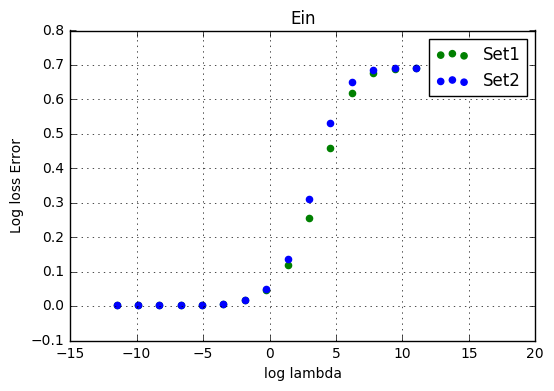

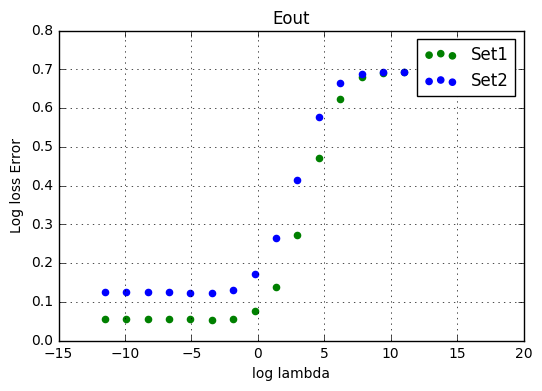

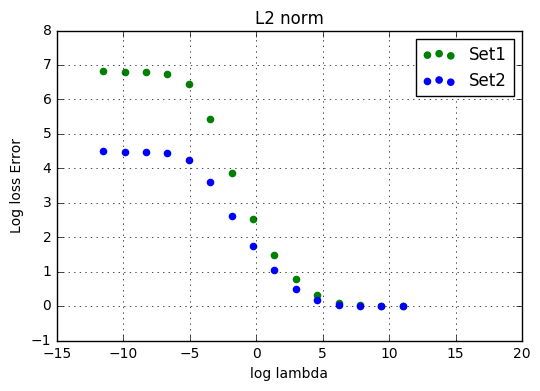

In [10]:


#save sum of errors so we don't have to re-run them
'''
Ein1 = np.array([0.2146585, 0.21524418, 0.21668717, 0.22561476, 0.27163838, 0.53019839, 1.621084,\
        4.65662977, 11.81885494, 25.66433039, 45.748442, 61.84294861, 67.67155562, \
        68.96231347, 69.21785345])

Ein2 = np.array([0.08520275, 0.0855433, 0.08640661, 0.08982212, 0.10875647, 0.21673251,\
        0.67943977, 2.02168509, 5.40919338, 12.46047605, 21.2709819, \
        26.04219946, 27.3583145, 27.63689749, 27.69721733])

Eout1 = np.array([1.67735905, 1.65388723, 1.64668242, 1.65987852, 1.61788035, 1.59147899, 1.67863178, \
         2.28327455, 4.12369628, 8.19766758, 14.0929275, 18.71240591, 20.37978767, 20.73703021,\
         20.77709055])

Eout2 = np.array([3.74384481, 3.73665792, 3.73108212, 3.69338096, 3.7418032, 3.71604705, \
         3.90808298, 5.15324003, 7.92488707, 12.41308748, 17.33397615, 19.90725766, \
         20.6137426, 20.75393352, 20.78338915])

Ein1 = Ein1/100   #divide by number of data points to get average
Ein2 = Ein2/40
Eout1 = Eout1/30
Eout2 = Eout2/30'''

log_lambda = np.log(lambdas)

plt.figure("Ein")
plt.title("Ein")
plt.xlabel("log lambda")
plt.ylabel("Log loss Error")
plt.scatter(log_lambda, Ein1, color = 'g')
plt.scatter(log_lambda, Ein2, color = 'b')
plt.legend(["Set1", "Set2"])
plt.grid(True)
plt.xlim(-15, 20)
plt.savefig("Ein_reg")

plt.figure("Eout")
plt.title("Eout")
plt.xlabel("log lambda")
plt.ylabel("Log loss Error")
plt.scatter(log_lambda, Eout1, color = 'g')
plt.scatter(log_lambda, Eout2, color = 'b')
plt.legend(["Set1", "Set2"])
plt.grid(True)
plt.xlim(-15, 20)
plt.savefig("Eout_reg")


plt.figure("L2 norm")
plt.title("L2 norm")
plt.xlabel("log lambda")
plt.ylabel("Log loss Error")
plt.scatter(log_lambda, norm1, color = 'g')
plt.scatter(log_lambda, norm2, color = 'b')
plt.legend(["Set1", "Set2"])
plt.grid(True)
plt.xlim(-15, 20)
plt.savefig("norms_reg")